<h1>Importing Libraries</h1

In [6]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

from mne.io import concatenate_raws, read_raw_edf
import antropy as ant
import mne
import mne_features
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [7]:
participants = pd.read_csv("C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Corollary/Parkinson's disease dataset/participants.tsv", sep='\t')
participants

participant_id  age gender hand  MMSE  NAART  disease_duration  \
0         sub-hc1   54      f    r    30     48               NaN   
1         sub-hc2   50      f    r    30     55               NaN   
2         sub-pd3   52      f    r    29     44               9.0   
3         sub-hc4   50      f    r    30     52               NaN   
4         sub-pd5   67      f    r    29     48               2.0   
5         sub-pd6   62      f    r    30     42               8.0   
6         sub-hc7   54      f    r    26     48               NaN   
7         sub-hc8   71      f    r    29     41               NaN   
8         sub-pd9   55      f    r    28     50              12.0   
9        sub-hc10   59      f    r    29     51               NaN   
10       sub-pd12   74      m    r    26     53               1.0   
11       sub-pd11   71      f    r    30     52               1.0   
12       sub-pd13   62      m    r    29     47               2.0   
13       sub-pd14   63      m    r    28     35               2.0   
14       sub-pd16   74      m    r    29     56               2.0   
15       sub-pd17   55      m    r    30     40               2.0   
16       sub-hc18   57      m    r    30     57               NaN   
17       sub-pd19   69      f    r    29     43               6.0   
18       sub-hc20   68      m    r    30     58               NaN   
19       sub-hc21   72      m    r    28     33               NaN   
20       sub-pd22   47      m    r    30     51               6.0   
21       sub-pd23   66      f    r    29     34               3.0   
22       sub-hc24   61      f    r    30     57               NaN   
23       sub-hc25   74      f    r    30     49               NaN   
24       sub-pd26   71      f    r    29     51               3.0   
25       sub-pd28   61      m    r    29     46               9.0   
26       sub-hc29   60      f    r    29     45               NaN   
27       sub-hc30   69      m    r    29     52               NaN   
28       sub-hc31   82      m    r    28     50               NaN   
29       sub-hc32   60      m    r    29     37               NaN   
30       sub-hc33   75      m    r    30     53               NaN   

                                          rl_deficits  \
0                                                 NaN   
1                                                 NaN   
2                                                   R   
3                                                 NaN   
4                       No clear side, perhaps more L   
5                          L OFF meds, more R ON meds   
6                                                 NaN   
7                                                 NaN   
8                                                   R   
9                                                 NaN   
10                                                NaN   
11                                        R worse off   
12                                   R slightly worse   
13                                        R worse off   
14           Started on left, noticed left side worse   
15                 started on R; Right slightly worse   
16                                                NaN   
17                started on Left side, left is worse   
18                                                NaN   
19                                                NaN   
20                started on Left side, left is worse   
21                        started on L, left is worse   
22                                                NaN   
23                                                NaN   
24  started L leg tremor, then moved to right arm ...   
25                started on right, but left is worse   
26                                                NaN   
27                                                NaN   
28                                                NaN   
29                                                NaN   
30                         

In [9]:
subject = "sub-hc2"
path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Corollary/Parkinson's disease dataset/Healthy/{subject}/"
filename = f"ses-hc/eeg/{subject}_ses-hc_task-rest_eeg.bdf"

In [40]:
drop = open(f"{path}drop.txt", "r")
exclude_list = drop.read().split(',')
exclude_list = [int(i) for i in exclude_list]
exclude_list

[0]

In [11]:
EEG_data = mne.io.read_raw_bdf(f"{path}{filename}", preload=True)
EEG_data

Extracting EDF parameters from C:\Users\utkar\Desktop\Research_Paper\EEG Analysis\Corollary\Parkinson's disease dataset\Healthy\sub-hc2\ses-hc\eeg\sub-hc2_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 99327  =      0.000 ...   193.998 secs...


<RawEDF | sub-hc2_ses-hc_task-rest_eeg.bdf, 41 x 99328 (194.0 s), ~31.1 MB, data loaded>

Using matplotlib as 2D backend.
Opening raw-browser...


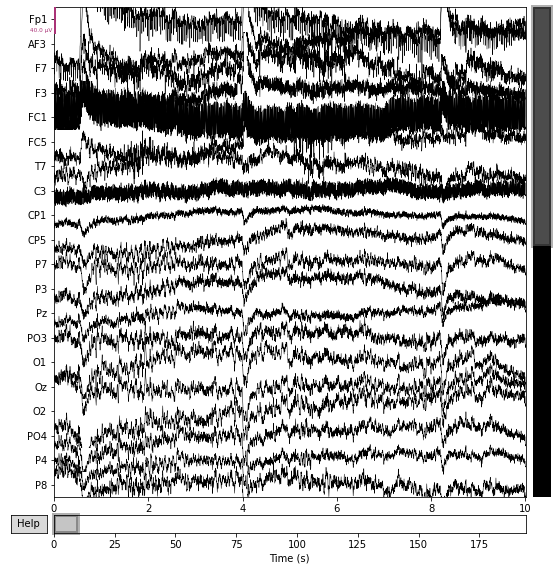

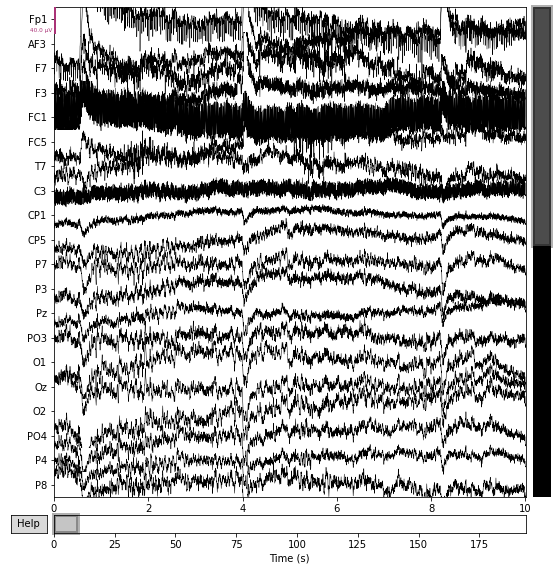

In [12]:
EEG_data.plot()

In [13]:
low_freq, high_freq = 1.0, 40.0 # values in Hz
raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.9s finished


In [14]:
raw.crop(tmax=150)

<RawEDF | sub-hc2_ses-hc_task-rest_eeg.bdf, 41 x 76801 (150.0 s), ~24.1 MB, data loaded>

Opening raw-browser...


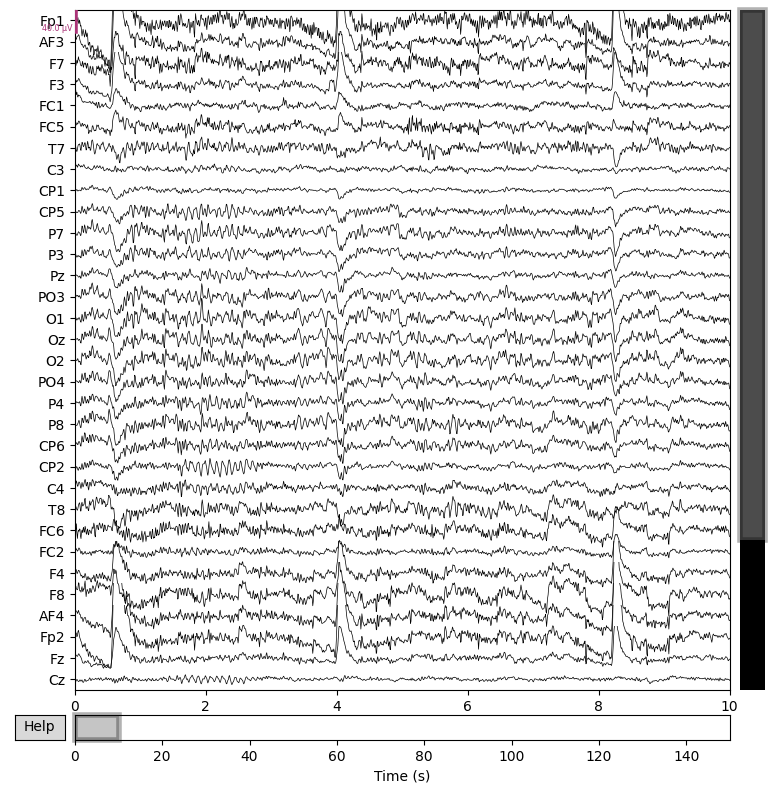

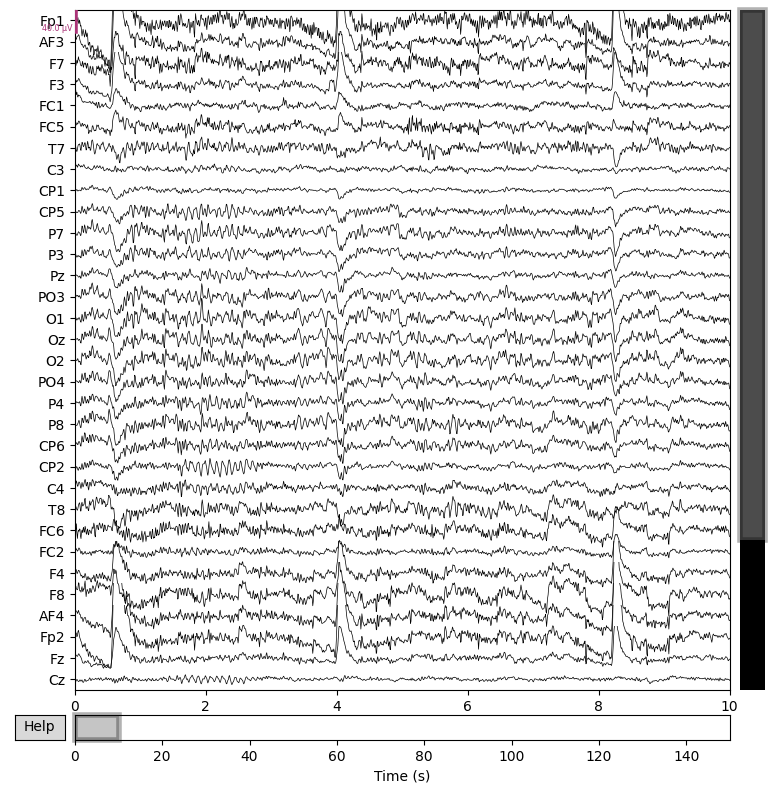

In [15]:
raw.plot(n_channels = 32)

In [16]:
raw = raw.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status'])

In [20]:
std_montage = mne.channels.make_standard_montage('biosemi32')
raw.set_montage(std_montage)

<RawEDF | sub-hc2_ses-hc_task-rest_eeg.bdf, 32 x 76801 (150.0 s), ~18.8 MB, data loaded>

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 31.8s.


c:\Users\utkar\anaconda3\envs\EEG_pycaret\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



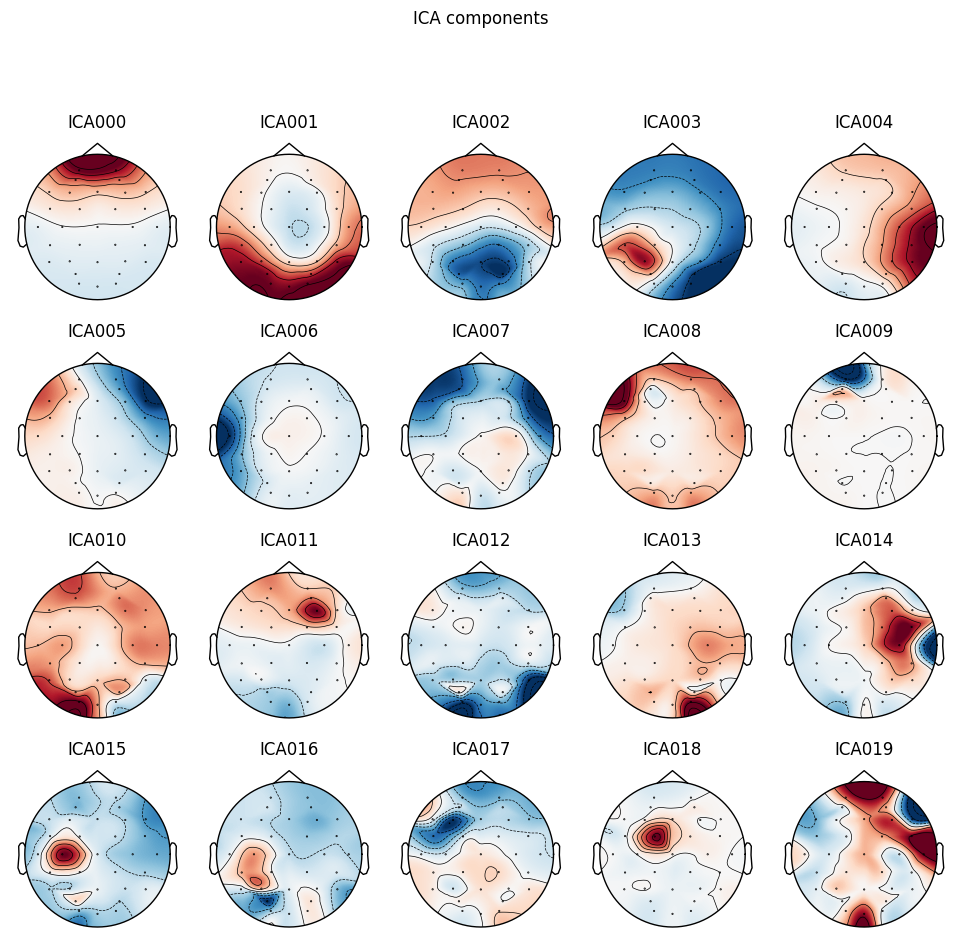

[<MNEFigure size 975x967 with 20 Axes>]

In [24]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)
ica.fit(raw.copy())
ica.plot_components(outlines='head')

In [25]:
raw.ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz']

Using EOG channels: Fp2, F8
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25

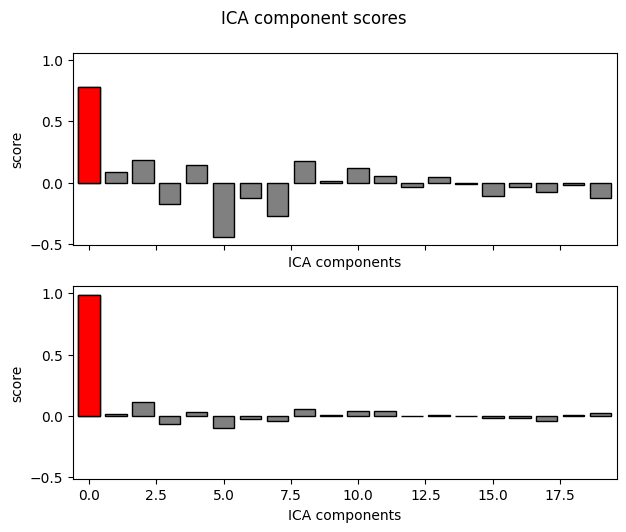

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
75 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


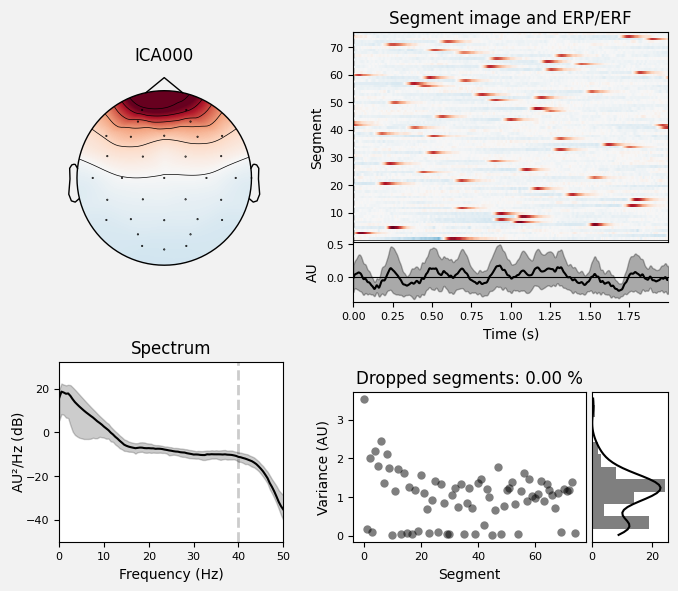

Creating RawArray with float64 data, n_channels=20, n_times=76801
    Range : 0 ... 76800 =      0.000 ...   150.000 secs
Ready.
Opening ica-browser...


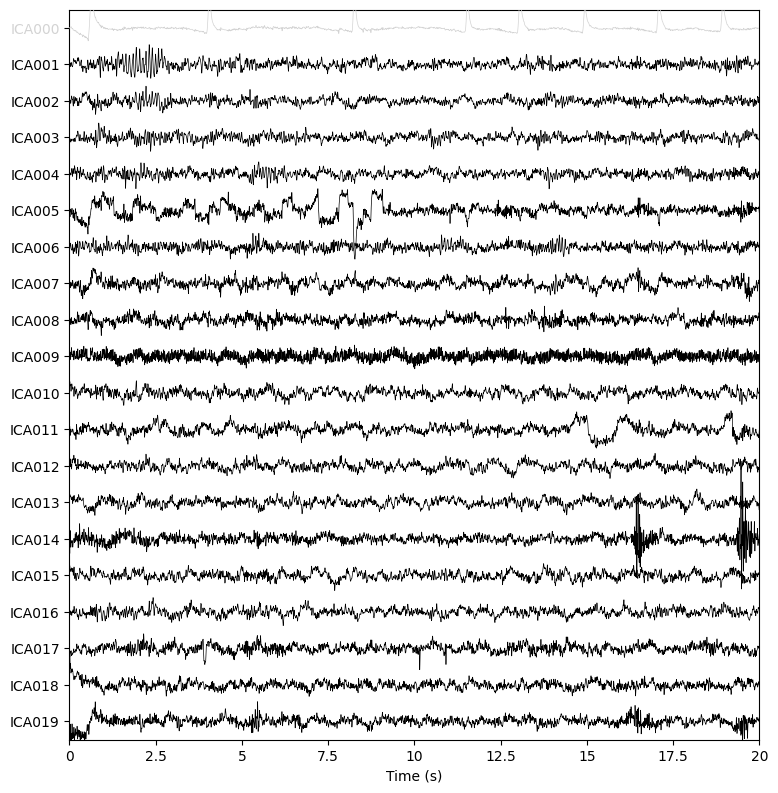

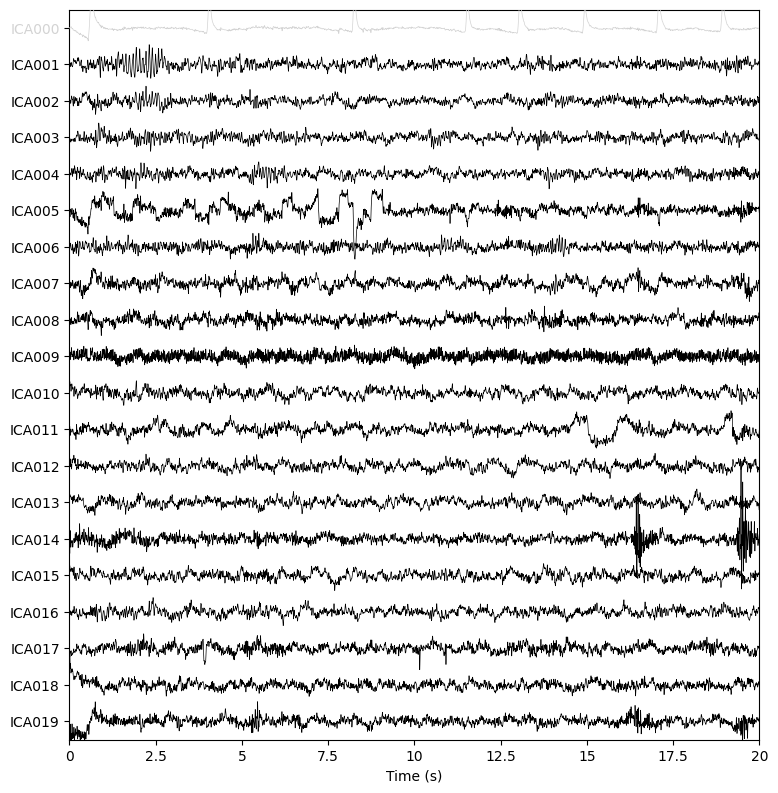

In [26]:
ica.exclude = []
# find which ICs match the EOG pattern
eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name=['Fp2', 'F8'], threshold=1.96)
ica.exclude = eog_indices

# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)

# plot diagnostics
ica.plot_properties(raw, picks=eog_indices)

# plot ICs applied to raw data, with EOG matches highlighted
ica.plot_sources(raw, show_scrollbars=False)

In [41]:
ica.exclude = exclude_list
ica.exclude

[0]

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 1 ICA component
    Projecting back using 32 PCA components
Opening raw-browser...


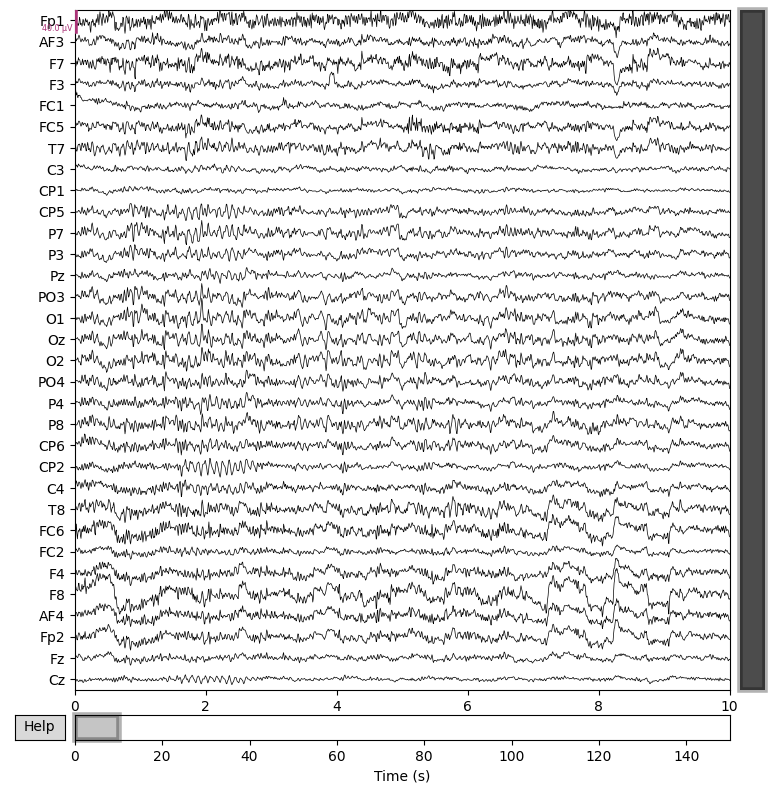

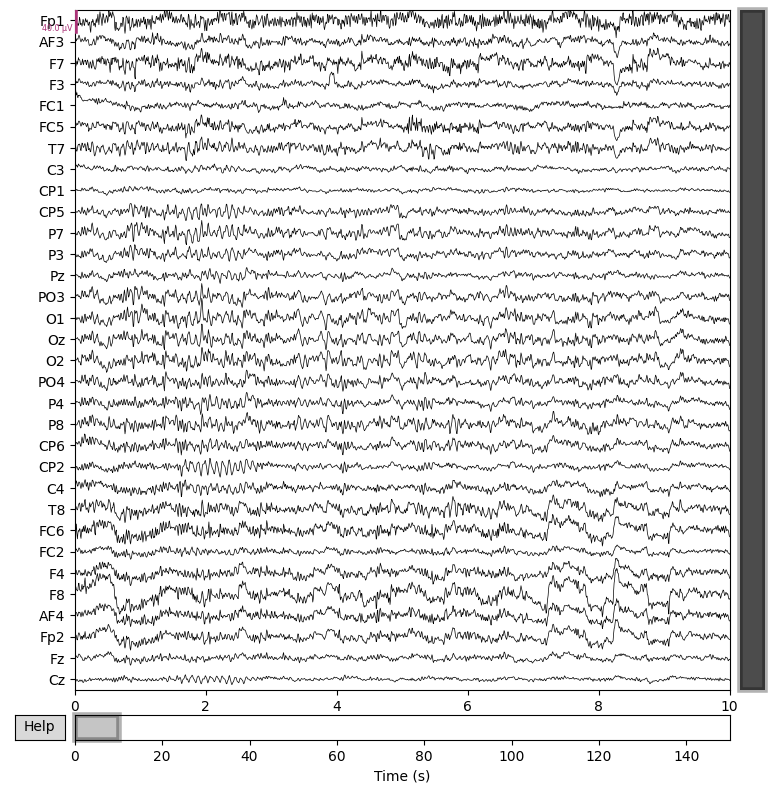

In [42]:
raw_clean = ica.apply(raw.copy(), exclude = ica.exclude)
raw_clean.plot(n_channels = 32)

In [43]:
xRaw = raw_clean.get_data()
len(xRaw[0])

76801

<h2>Calculating Fractal Dimensions</h2>

In [44]:
#len(x_raw)
df_higuchi = pd.DataFrame(columns = raw.ch_names)
df_katz = pd.DataFrame(columns = raw.ch_names)
df_petrosian = pd.DataFrame(columns = raw.ch_names)
df_spec_ent = pd.DataFrame(columns = raw.ch_names)
df_perm_ent = pd.DataFrame(columns = raw.ch_names)


channel_no=0
for row in xRaw: #row === channel_no.
    
    hig_channel_series = []
    katz_channel_series = []
    petrosian_channel_series = []
    spec_ent_channel_series = []
    perm_ent_channel_series = []
    
    for i in range(512,len(xRaw[0]),256):
        hig_channel_series.append(ant.higuchi_fd(row[i-512:i]))
        katz_channel_series.append(ant.katz_fd(row[i-512:i]))
        petrosian_channel_series.append(ant.petrosian_fd(row[i-512:i]))
        spec_ent_channel_series.append(ant.spectral_entropy(row[i-512:i], sf=1000, method='welch', normalize=True))
        perm_ent_channel_series.append(ant.perm_entropy(row[i-512:i], normalize=True))
        
    df_higuchi.iloc[:,channel_no] = hig_channel_series
    df_katz.iloc[:,channel_no] = katz_channel_series
    df_petrosian.iloc[:,channel_no] = petrosian_channel_series
    df_spec_ent.iloc[:,channel_no] = spec_ent_channel_series
    df_perm_ent.iloc[:,channel_no] = perm_ent_channel_series
    
    #print(len(channel_series))
    channel_no += 1        

In [45]:
df_higuchi

Fp1       AF3        F7        F3       FC1       FC5        T7  \
0    1.262364  1.199812  1.252609  1.194378  1.272806  1.211005  1.134553   
1    1.262351  1.201916  1.239956  1.176496  1.208389  1.196843  1.147643   
2    1.266209  1.201900  1.250362  1.194206  1.233017  1.203926  1.160581   
3    1.242655  1.203681  1.274499  1.185593  1.269338  1.228657  1.158198   
4    1.240201  1.205477  1.282840  1.179765  1.245995  1.251595  1.163595   
..        ...       ...       ...       ...       ...       ...       ...   
294  1.187408  1.147053  1.135257  1.139443  1.201894  1.141512  1.121749   
295  1.216238  1.164160  1.140383  1.138203  1.175559  1.149472  1.138039   
296  1.239898  1.189274  1.140917  1.176936  1.188766  1.168373  1.128600   
297  1.222016  1.159963  1.160935  1.167698  1.199015  1.158594  1.151270   
298  1.261130  1.157970  1.157778  1.138959  1.149146  1.144442  1.130144   

           C3       CP1       CP5  ...        C4        T8       FC6  \
0    1.217915  1.174715  1.140870  ...  1.185704  1.173311  1.224992   
1    1.198253  1.153890  1.124625  ...  1.171097  1.175145  1.193464   
2    1.161921  1.159920  1.109654  ...  1.157696  1.181721  1.204226   
3    1.149070  1.191698  1.088732  ...  1.122900  1.170775  1.204063   
4    1.160980  1.176833  1.102264  ...  1.130721  1.179456  1.225398   
..        ...       ...       ...  ...       ...       ...       ...   
294  1.184181  1.130537  1.113756  ...  1.161088  1.109264  1.140700   
295  1.196142  1.156628  1.132023  ...  1.156446  1.097711  1.125903   
296  1.200900  1.159680  1.129733  ...  1.097880  1.127096  1.131277   
297  1.191277  1.120105  1.109115  ...  1.127924  1.117854  1.134537   
298  1.183740  1.080387  1.064543  ...  1.138236  1.082990  1.116127   

          FC2        F4        F8       AF4       Fp2        Fz        Cz  
0    1.191464  1.218970  1.209004  1.197700  1.200488  1.179775  1.182830  
1    1.157254  1.211758  1.206320  1.191592  1.186380  1.161195  1.163816  
2    1.145149  1.208469  1.229974  1.211059  1.199600  1.164555  1.121542  
3    1.130769  1.207350  1.181661  1.198117  1.167718  1.167624  1.082034  
4    1.161850  1.185655  1.188014  1.219439  1.166106  1.170006  1.097489  
..        ...       ...       ...       ...       ...       ...       ...  
294  1.128716  1.148571  1.126199  1.164409  1.129060  1.131202  1.144529  
295  1.144778  1.163139  1.119915  1.203021  1.123302  1.145420  1.170357  
296  1.163082  1.209348  1.162811  1.222280  1.177441  1.164247  1.139599  
297  1.138755  1.187956  1.163665  1.217475  1.139601  1.123437  1.122416  
298  1.132449  1.143437  1.141908  1.204677  1.111591  1.099481  1.108011  

[299 rows x 32 columns]

In [46]:
df_higuchi.to_csv(f"{path}{subject}_healthy_50pct.csv", index=False)
df_katz.to_csv(f"{path}{subject}_healthy_katz_50pct.csv", index=False)
df_petrosian.to_csv(f"{path}{subject}_healthy_petrosian_50pct.csv", index=False)
df_spec_ent.to_csv(f"{path}{subject}_healthy_spec_ent_50pct.csv", index=False)
df_perm_ent.to_csv(f"{path}{subject}_healthy_perm_ent_50pct.csv", index=False)

Opening raw-browser...


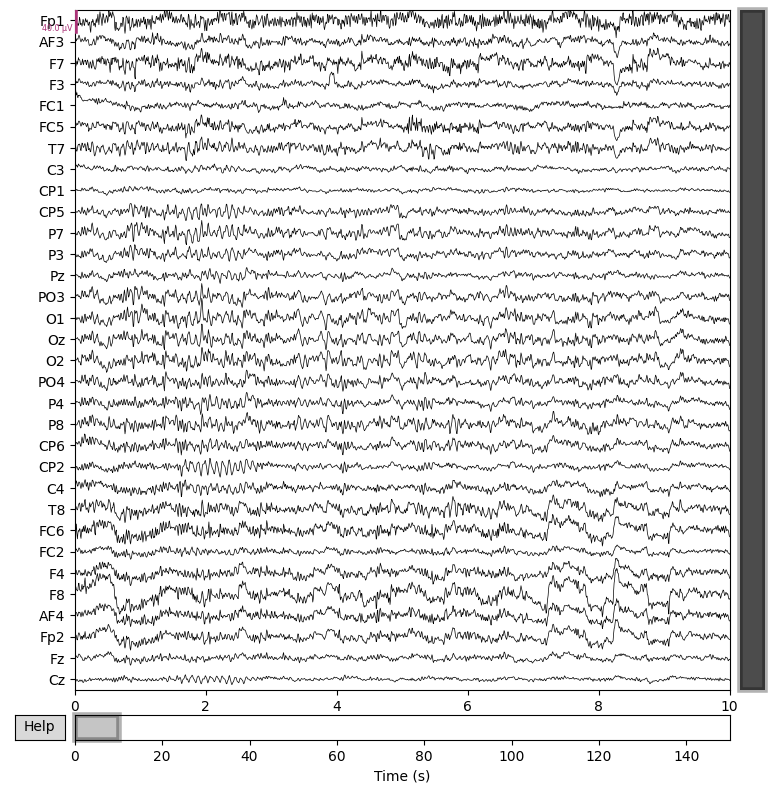

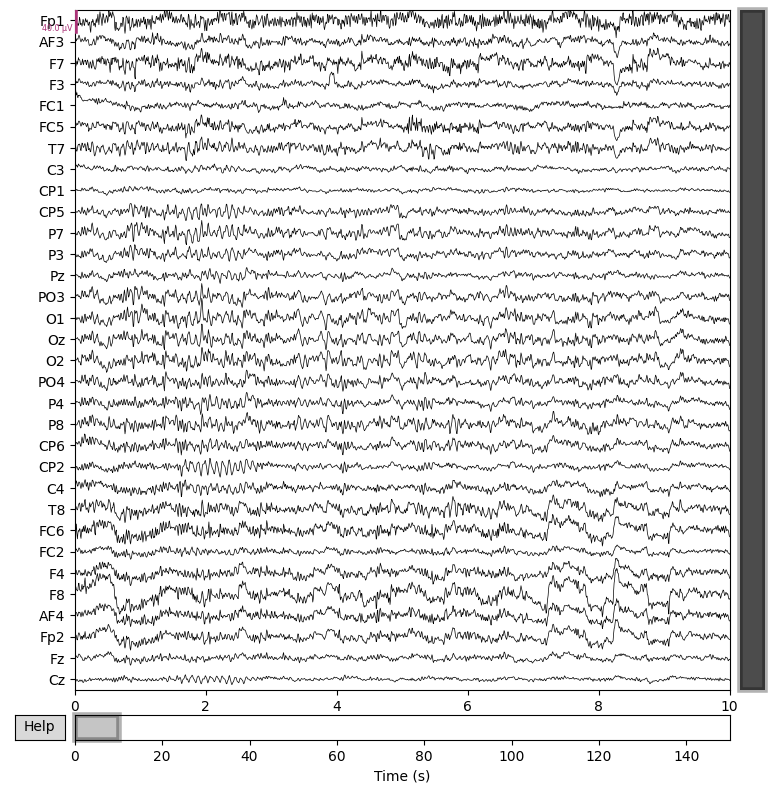

In [47]:
raw_clean.plot(n_channels=32)